In [1]:
import os
import cv2

def preprocess_images(input_dir, output_dir, img_size=(128, 128)):
    """
    Preprocess images by resizing, normalizing, and saving to an output directory.
    
    Args:
        input_dir (str): Path to the directory containing raw images.
        output_dir (str): Path to save preprocessed images.
        img_size (tuple): Desired image size (width, height).
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    for class_name in os.listdir(input_dir):  # Iterate through class folders
        class_path = os.path.join(input_dir, class_name)
        if not os.path.isdir(class_path):
            continue  # Skip non-folder files

        # Create class folder in output directory
        output_class_path = os.path.join(output_dir, class_name)
        os.makedirs(output_class_path, exist_ok=True)

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                # Read the image
                img = cv2.imread(img_path)

                # Resize the image
                img_resized = cv2.resize(img, img_size)

                # Normalize pixel values to [0, 1]
                img_normalized = img_resized / 255.0

                # Optional: Apply denoising filter (if noisy images)
                img_denoised = cv2.fastNlMeansDenoisingColored(
                    (img_normalized * 255).astype("uint8"), None, 10, 10, 7, 21
                )

                # Save the preprocessed image
                output_path = os.path.join(output_class_path, img_name)
                cv2.imwrite(output_path, (img_denoised * 255).astype("uint8"))
                print(f"Processed and saved: {output_path}")
            except Exception as e:
                print(f"Error processing {img_path}: {e}")


# Define paths
input_directory = "D:/lofty intern/PADDY IMAGES/paddy_images_raw"  # Path to raw images
output_directory = "D:/lofty intern/PADDY IMAGES/paddy_images_preprocessed"  # Path to save preprocessed images

# Run preprocessing
preprocess_images(input_directory, output_directory)


Processed and saved: D:/lofty intern/PADDY IMAGES/paddy_images_preprocessed\sample 1\100023 - Copy.jpg
Processed and saved: D:/lofty intern/PADDY IMAGES/paddy_images_preprocessed\sample 1\100023.jpg
Processed and saved: D:/lofty intern/PADDY IMAGES/paddy_images_preprocessed\sample 1\100049 - Copy.jpg
Processed and saved: D:/lofty intern/PADDY IMAGES/paddy_images_preprocessed\sample 1\100049.jpg
Processed and saved: D:/lofty intern/PADDY IMAGES/paddy_images_preprocessed\sample 1\100126 - Copy.jpg
Processed and saved: D:/lofty intern/PADDY IMAGES/paddy_images_preprocessed\sample 1\100126.jpg
Processed and saved: D:/lofty intern/PADDY IMAGES/paddy_images_preprocessed\sample 1\100133 - Copy.jpg
Processed and saved: D:/lofty intern/PADDY IMAGES/paddy_images_preprocessed\sample 1\100133.jpg
Processed and saved: D:/lofty intern/PADDY IMAGES/paddy_images_preprocessed\sample 1\100148 - Copy.jpg
Processed and saved: D:/lofty intern/PADDY IMAGES/paddy_images_preprocessed\sample 1\100148.jpg
Proce

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [4]:
# Define paths
train_dir = 'D:/lofty intern/PADDY IMAGES/paddy_images_raw'  # Replace with path to your training images
validation_dir = 'D:/lofty intern/PADDY IMAGES/paddy_images_preprocessed'  # Replace with path to your validation images
img_size = (128, 128)  # Image size to match model input
batch_size = 32

In [5]:
# Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'  # Multi-class classification
)

Found 6000 images belonging to 10 classes.


In [7]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 6000 images belonging to 10 classes.


In [8]:
# Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes (9 diseases + normal)
])

C:\Users\aakas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

C:\Users\aakas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.1475 - loss: 2.3412  

C:\Users\aakas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


187/187 ━━━━━━━━━━━━━━━━━━━━ 131s 692ms/step - accuracy: 0.1476 - loss: 2.3406 - val_accuracy: 0.1001 - val_loss: 5.1903
Epoch 2/50
  1/187 ━━━━━━━━━━━━━━━━━━━━ 58s 315ms/step - accuracy: 0.1875 - loss: 2.1944

C:\Users\aakas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


187/187 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.1875 - loss: 2.1944 - val_accuracy: 0.1003 - val_loss: 5.5785
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 84s 447ms/step - accuracy: 0.2547 - loss: 2.0888 - val_accuracy: 0.1038 - val_loss: 2.9770
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.3125 - loss: 1.8151 - val_accuracy: 0.1019 - val_loss: 3.0224
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 90s 480ms/step - accuracy: 0.3040 - loss: 1.9507 - val_accuracy: 0.1048 - val_loss: 4.2109
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.1875 - loss: 2.2578 - val_accuracy: 0.0946 - val_loss: 4.2352
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 84s 446ms/step - accuracy: 0.3699 - loss: 1.7878 - val_accuracy: 0.0779 - val_loss: 3.6055
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - accuracy: 0.4062 - loss: 1.8269 - val_accuracy: 0.0810 - val_loss: 3.6343
Epoch 9/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 89s 474ms/step - accuracy: 0.4255 - loss: 1.6830 - val_acc

In [11]:
# Save the Model
model.save('disease_classifier_model.h5')

In [12]:
# Evaluate the Model on validation data
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {validation_accuracy:.2f}, Validation Loss: {validation_loss:.2f}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.1030 - loss: 7.7236 
Validation Accuracy: 0.11, Validation Loss: 7.59


In [13]:
# Prediction function
def predict_disease(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    # Predict the class
    prediction = model.predict(img_array)

    
    # Get the predicted class index
    predicted_class_idx = np.argmax(prediction, axis=-1)
    
    # Class labels (9 diseases + normal)
    class_labels = ['bacterial_leaf_blight',
'bacterial_leaf_streak',
'bacterial_panicle_blight',
'blast',
'brown_spot',
'dead_heart',
'downy_mildew',
'hispa',
'normal',
'tungro']
    # Output the result
    print(f"Predicted class: {class_labels[predicted_class_idx[0]]}")

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Predicted class: normal


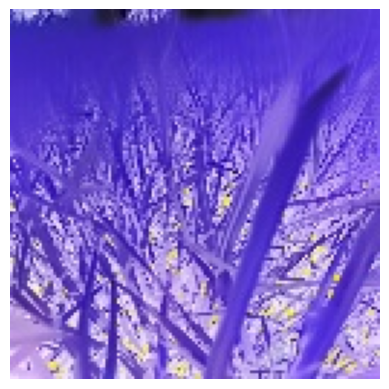

In [14]:
# Example usage"C:\Users\Nandan\Desktop\5g"
img_path = "D:/lofty intern/PADDY IMAGES/paddy_images_preprocessed/sample 9/100025.jpg"  # Replace with the actual test image path
predict_disease(img_path)

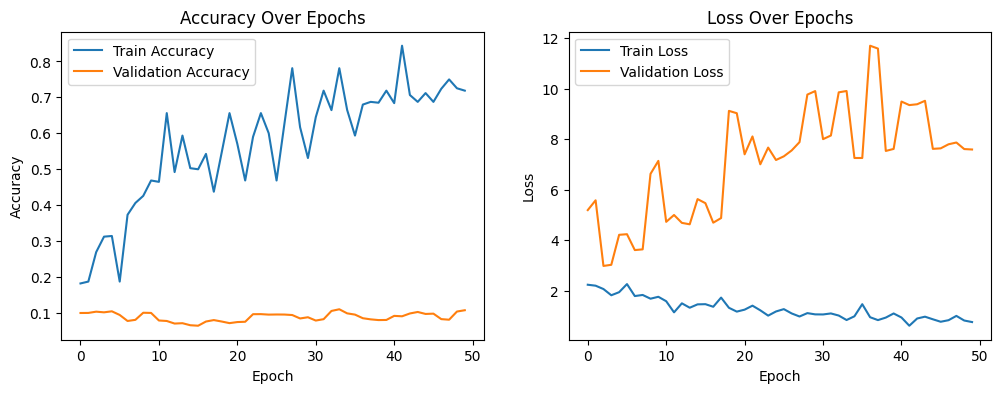

In [15]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Predicted class: normal


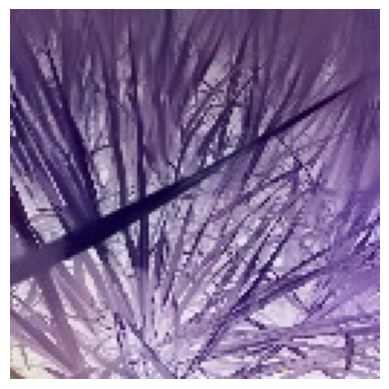

In [16]:
# Example usage"C:\Users\Nandan\Desktop\5g"
img_path = "D:/lofty intern/PADDY IMAGES/paddy_images_preprocessed/sample 1/100133.jpg"  # Replace with the actual test image path
predict_disease(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predicted class: blast


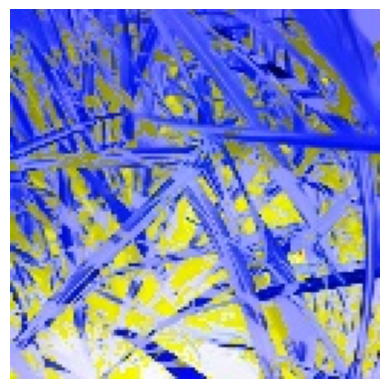

In [17]:
img_path = "D:/lofty intern/PADDY IMAGES/paddy_images_preprocessed/sample 4/100560.jpg"  # Replace with the actual test image path
predict_disease(img_path)